In [2]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plots
%matplotlib inline
plots.style.use('fivethirtyeight')

In [3]:
all_coins = Table.read_table("prices.csv")
market_caps = Table.read_table("market_caps.csv")
all_coins.show(3)
market_caps.show(10)

Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD),Day
BTC,2020-06-28,9101.85,9022.01,9190.12,8949.76,0
BTC,2020-06-29,9188.06,9101.88,9233.53,9032.44,1
BTC,2020-06-30,9148.44,9188.04,9201.65,9067.19,2


Name,Symbol,Market Cap,Stable Coin
Bitcoin,BTC,648.83,No
Ethereum,ETH,231.17,No
Tether,USDT,62.25,Yes
Binance Coin,BNB,44.23,No
Cardano,ADA,44.22,No
Dogecoin,DOGE,33.47,No
XRP,XRP,29.74,No
USD Coin,USDC,25.94,Yes
Polkadot,DOT,14.31,No
Binance USD,BUSD,10.01,No


# Categorical Distributions

### tbl.group(column)

In [4]:
market_caps

Name,Symbol,Market Cap,Stable Coin
Bitcoin,BTC,648.83,No
Ethereum,ETH,231.17,No
Tether,USDT,62.25,Yes
Binance Coin,BNB,44.23,No
Cardano,ADA,44.22,No
Dogecoin,DOGE,33.47,No
XRP,XRP,29.74,No
USD Coin,USDC,25.94,Yes
Polkadot,DOT,14.31,No
Binance USD,BUSD,10.01,No


In [5]:
market_caps.group("Stable Coin")

Stable Coin,count
No,8
Yes,2


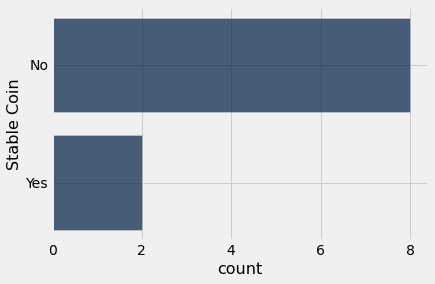

In [6]:
market_caps.group("Stable Coin").barh("Stable Coin", "count")

In [7]:
## Questions?
## Back to slides

# Numerical Distributions

In [8]:
btc_close = all_coins.where("Currency", "BTC").select("Closing Price (USD)")
btc_close.show(5)

Closing Price (USD)
9101.85
9188.06
9148.44
9236.32
9097.8


In [9]:
## Range of the data?

In [10]:
min(btc_close.column(0)), max(btc_close.column(0))

(9055.4644825162, 63346.7890351052)

### tbl.bin("Numerical Values", bins=arr)

In [11]:
btc_close.bin("Closing Price (USD)").show()

bin,Closing Price (USD) count
9055.46,130
14484.6,41
19913.7,10
25342.9,9
30772,38
36201.1,37
41630.3,10
47059.4,27
52488.5,39
57917.7,24


In [12]:
uniform_bins = np.arange(0, 70001, 10000)

In [13]:
binned = btc_close.bin("Closing Price (USD)", bins=uniform_bins)
binned

bin,Closing Price (USD) count
0,29
10000,142
20000,17
30000,72
40000,31
50000,67
60000,7
70000,0


In [14]:
sum(binned.column(1))

365

In [15]:
non_uniform_bins = make_array(0, 35000, 50000, 67000)
btc_close.bin("Closing Price (USD)", bins=non_uniform_bins)

bin,Closing Price (USD) count
0,219
35000,72
50000,74
67000,0


In [16]:
not_all_data_bins = np.arange(0, 45001, 5000)
btc_close.bin("Closing Price (USD)", bins=not_all_data_bins).show()
sum(btc_close.bin("Closing Price (USD)", bins=not_all_data_bins).column(1))

bin,Closing Price (USD) count
0,0
5000,29
10000,102
15000,40
20000,10
25000,7
30000,31
35000,41
40000,8
45000,0


268

# Percentages

In [1]:
non_uniform_bins = make_array(0, 35000, 50000, 67000)

binned = btc_close.bin("Closing Price (USD)", bins=non_uniform_bins)
binned

NameError: name 'make_array' is not defined

In [44]:
btc_close.num_rows, sum(binned.column('Closing Price (USD) count'))

(365, 365)

In [45]:
with_percents = binned.with_column(
    'Percent', binned.column('Closing Price (USD) count') / btc_close.num_rows * 100)
with_percents

bin,Closing Price (USD) count,Percent
0,219,60
35000,72,19.726
50000,67,18.3562
60000,7,1.91781
64000,0,0


In [60]:
## Questions on bins and percentages?
## Slides

# Histograms
- Area is the percent (%)
- width is the range (original units)
- height is density (% / original units)

$$ \text{Area (%)} = \text{Width (original units)} * \text{Height (% / unit) }$$

$$ \frac{\text{Area (%)}}{\text{Width (original units)}} = \text{Height (% / unit) }$$

### Widths

In [48]:
# First width
first_width = with_percents.column("bin").item(1) - with_percents.column("bin").item(0)
first_width

35000

In [49]:
# All widths!
widths = np.diff(with_percents.column("bin"))
widths

array([35000, 15000, 10000,  4000])

### Heights

In [50]:
first_area = with_percents.column("Percent").item(0)
first_height = first_area / widths.item(0)
first_height

0.0017142857142857142

In [51]:
# What's the unit of the height again?
# Percent per unit, the unit is USD, so its Percent per Dollar!

In [52]:
all_heights = with_percents.column("Percent") / widths # Wrong number of items!
with_percents.with_column("Height", all_heights)

ValueError: operands could not be broadcast together with shapes (5,) (4,) 

### np.append(array, item to add to end of array)

I'm going to add 1 since I don't want to divide by 0.

In [53]:
all_heights = with_percents.column("Percent") / np.append(widths, 1)
with_hw = with_percents.with_columns("Width", np.append(widths, 0), "Height", all_heights)
with_hw

bin,Closing Price (USD) count,Percent,Width,Height
0,219,60,35000,0.00171429
35000,72,19.726,15000,0.00131507
50000,67,18.3562,10000,0.00183562
60000,7,1.91781,4000,0.000479452
64000,0,0,0,0


In [54]:
# Make sure formula holds!
with_hw.column("Width") * with_hw.column("Height")

array([60.        , 19.7260274 , 18.35616438,  1.91780822,  0.        ])

#### tbl.hist("Numerical Column", unit="String", bins=array (optional), group="Categorical column" (optional))

/usr/local/lib/python3.9/site-packages/datascience/tables.py:5206: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(ticks, rotation='vertical')


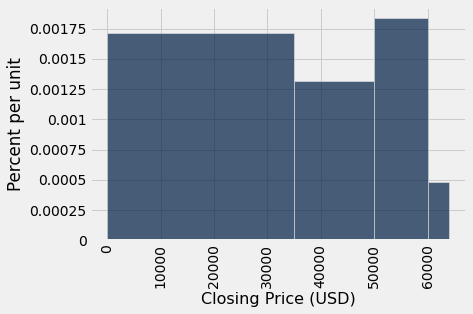

In [55]:
# Visualize?
btc_close.hist("Closing Price (USD)", bins=non_uniform_bins)

In [56]:
# Kind of hard to understand (since bins are not uniform!)

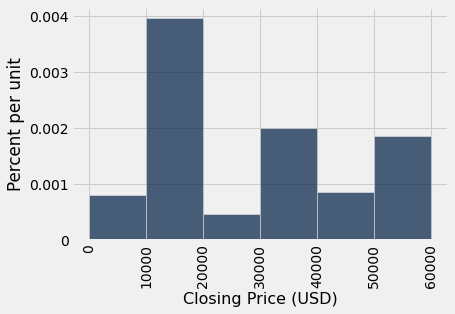

In [57]:
# Uniform Bins
btc_close.hist("Closing Price (USD)", bins=np.arange(0, 70000, 10000))

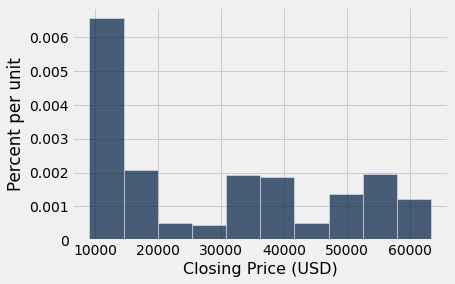

In [58]:
# Automatic Bins
btc_close.hist("Closing Price (USD)")

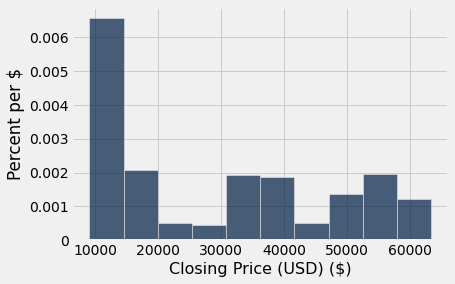

In [59]:
# Adding Unit (just get's added to the label)
btc_close.hist("Closing Price (USD)", unit="$")

# Welcome Survey Example

In [66]:
survey = Table.read_table("welcome_survey.csv").drop(0)
survey.show(5)

timezone,extraversion,texting info,hours sleep,sleep style
EST - Eastern Standard Time,7,6,7,On your right side
PST - Pacific Standard Time,10,5,5,On your right side
PST - Pacific Standard Time,6,7,8,On your right side
PST - Pacific Standard Time,6,2,7,On your back
PST - Pacific Standard Time,8,5,7,On your left side


In [67]:
number_of_participants=survey.num_rows
number_of_participants

251

### Categorical Data: Bar Charts

In [72]:
sleep = survey.group('sleep style')
sleep

sleep style,count
On your back,53
On your left side,78
On your right side,85
On your stomach,35


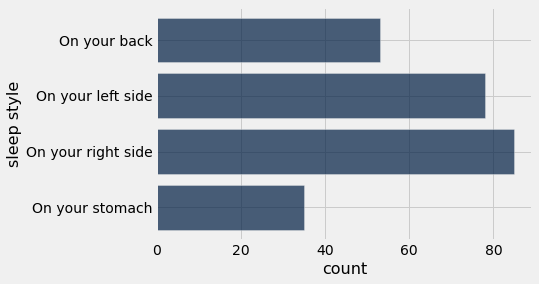

In [73]:
sleep.barh("sleep style")

### Numerical Data: Histograms

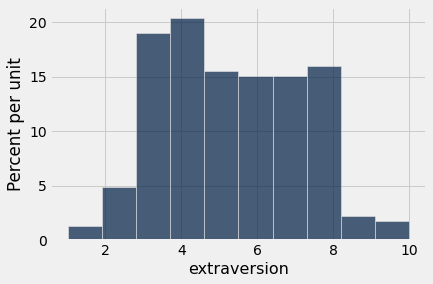

In [75]:
survey.hist('extraversion')

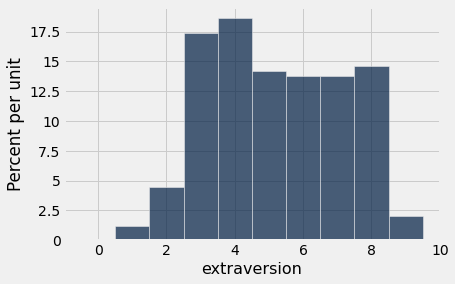

In [80]:
# Uniform bins
survey.hist('extraversion', bins=np.arange(-0.5, 10.5, 1))

### Overlaid!
### tbl.hist("numerical column", group="categorical column")

/usr/local/lib/python3.9/site-packages/datascience/tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array(tuple(values))


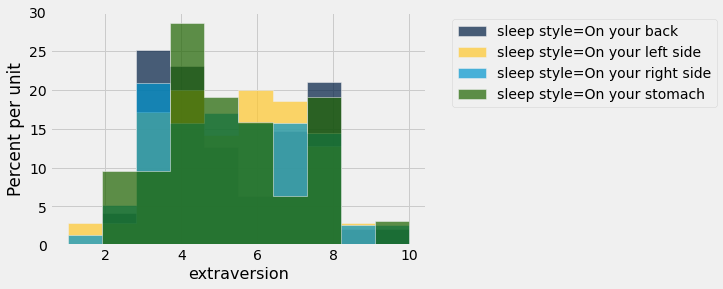

In [76]:
survey.hist('extraversion', group="sleep style")

/usr/local/lib/python3.9/site-packages/datascience/tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array(tuple(values))


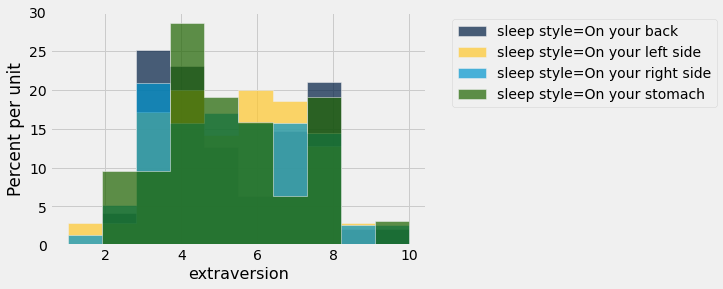

In [77]:
survey.hist('extraversion', group="sleep style")